<a href="https://colab.research.google.com/github/Ilhammkt/Machine-Learning/blob/main/UAS/SVHN_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ilham Khodar Trijaya

NIM : 1103213084

Model : CNN The Street View House Numbers (SVHN) Dataset

# 1. Mengimpor Library

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from scipy.io import loadmat
import requests
import os
import random

# 2. Unduh dan Memuat Dataset

In [2]:
def download_svhn(url, filename):
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        response = requests.get(url)
        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Downloaded {filename}")
    else:
        print(f"{filename} already exists.")

# URL untuk file dataset
train_url = 'http://ufldl.stanford.edu/housenumbers/train_32x32.mat'
test_url = 'http://ufldl.stanford.edu/housenumbers/test_32x32.mat'

# Nama file untuk disimpan
train_filename = 'train_32x32.mat'
test_filename = 'test_32x32.mat'

# Unduh file
download_svhn(train_url, train_filename)
download_svhn(test_url, test_filename)

# Fungsi untuk memuat data
def load_data(file):
    data = loadmat(file)
    X = data['X']
    y = data['y']
    X = np.moveaxis(X, -1, 0)
    y[y == 10] = 0
    return X, y

# Memuat data training dan testing
X_train, y_train = load_data(train_filename)
X_test, y_test = load_data(test_filename)

Downloaded train_32x32.mat
Downloaded test_32x32.mat


# 3. Preprocessing Data

In [3]:
# Normalisasi data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Konversi label ke bentuk one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4. Membangun Arsitektur CNN

In [4]:
# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# 5. Melatih Model

In [5]:
# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
1145/1145 [==============================] - 13s 7ms/step - loss: 1.1569 - accuracy: 0.6227 - val_loss: 0.5821 - val_accuracy: 0.8308
Epoch 2/10
1145/1145 [==============================] - 8s 7ms/step - loss: 0.5943 - accuracy: 0.8229 - val_loss: 0.4645 - val_accuracy: 0.8682
Epoch 3/10
1145/1145 [==============================] - 8s 7ms/step - loss: 0.4981 - accuracy: 0.8530 - val_loss: 0.4397 - val_accuracy: 0.8721
Epoch 4/10
1145/1145 [==============================] - 8s 7ms/step - loss: 0.4405 - accuracy: 0.8711 - val_loss: 0.3977 - val_accuracy: 0.8854
Epoch 5/10
1145/1145 [==============================] - 7s 6ms/step - loss: 0.3995 - accuracy: 0.8828 - val_loss: 0.3751 - val_accuracy: 0.8947
Epoch 6/10
1145/1145 [==============================] - 7s 6ms/step - loss: 0.3711 - accuracy: 0.8913 - val_loss: 0.3612 - val_accuracy: 0.8985
Epoch 7/10
1145/1145 [==============================] - 6s 5ms/step - loss: 0.3495 - accuracy: 0.8989 - val_loss: 0.3608 - val_accuracy

# 6. Evaluasi Model

814/814 [==============================] - 5s 5ms/step - loss: 0.3298 - accuracy: 0.9104
Test accuracy: 91.04%


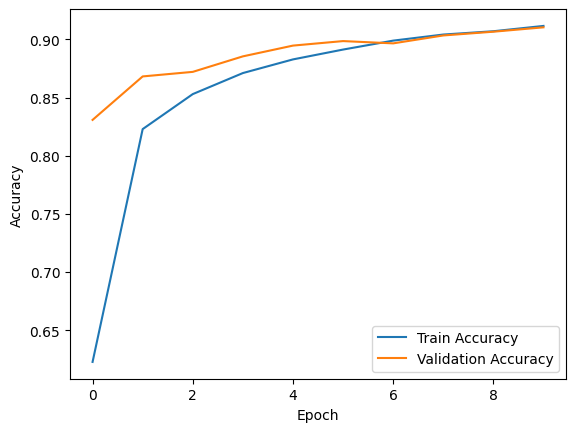

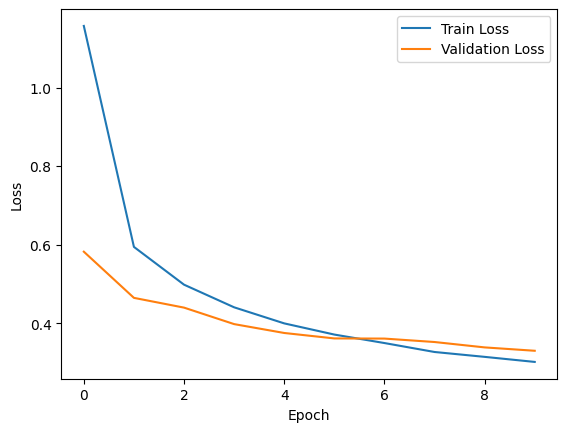

In [6]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Plot akurasi dan loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 7. Membuat Prediksi dan Visualisasi

814/814 [==============================] - 2s 3ms/step


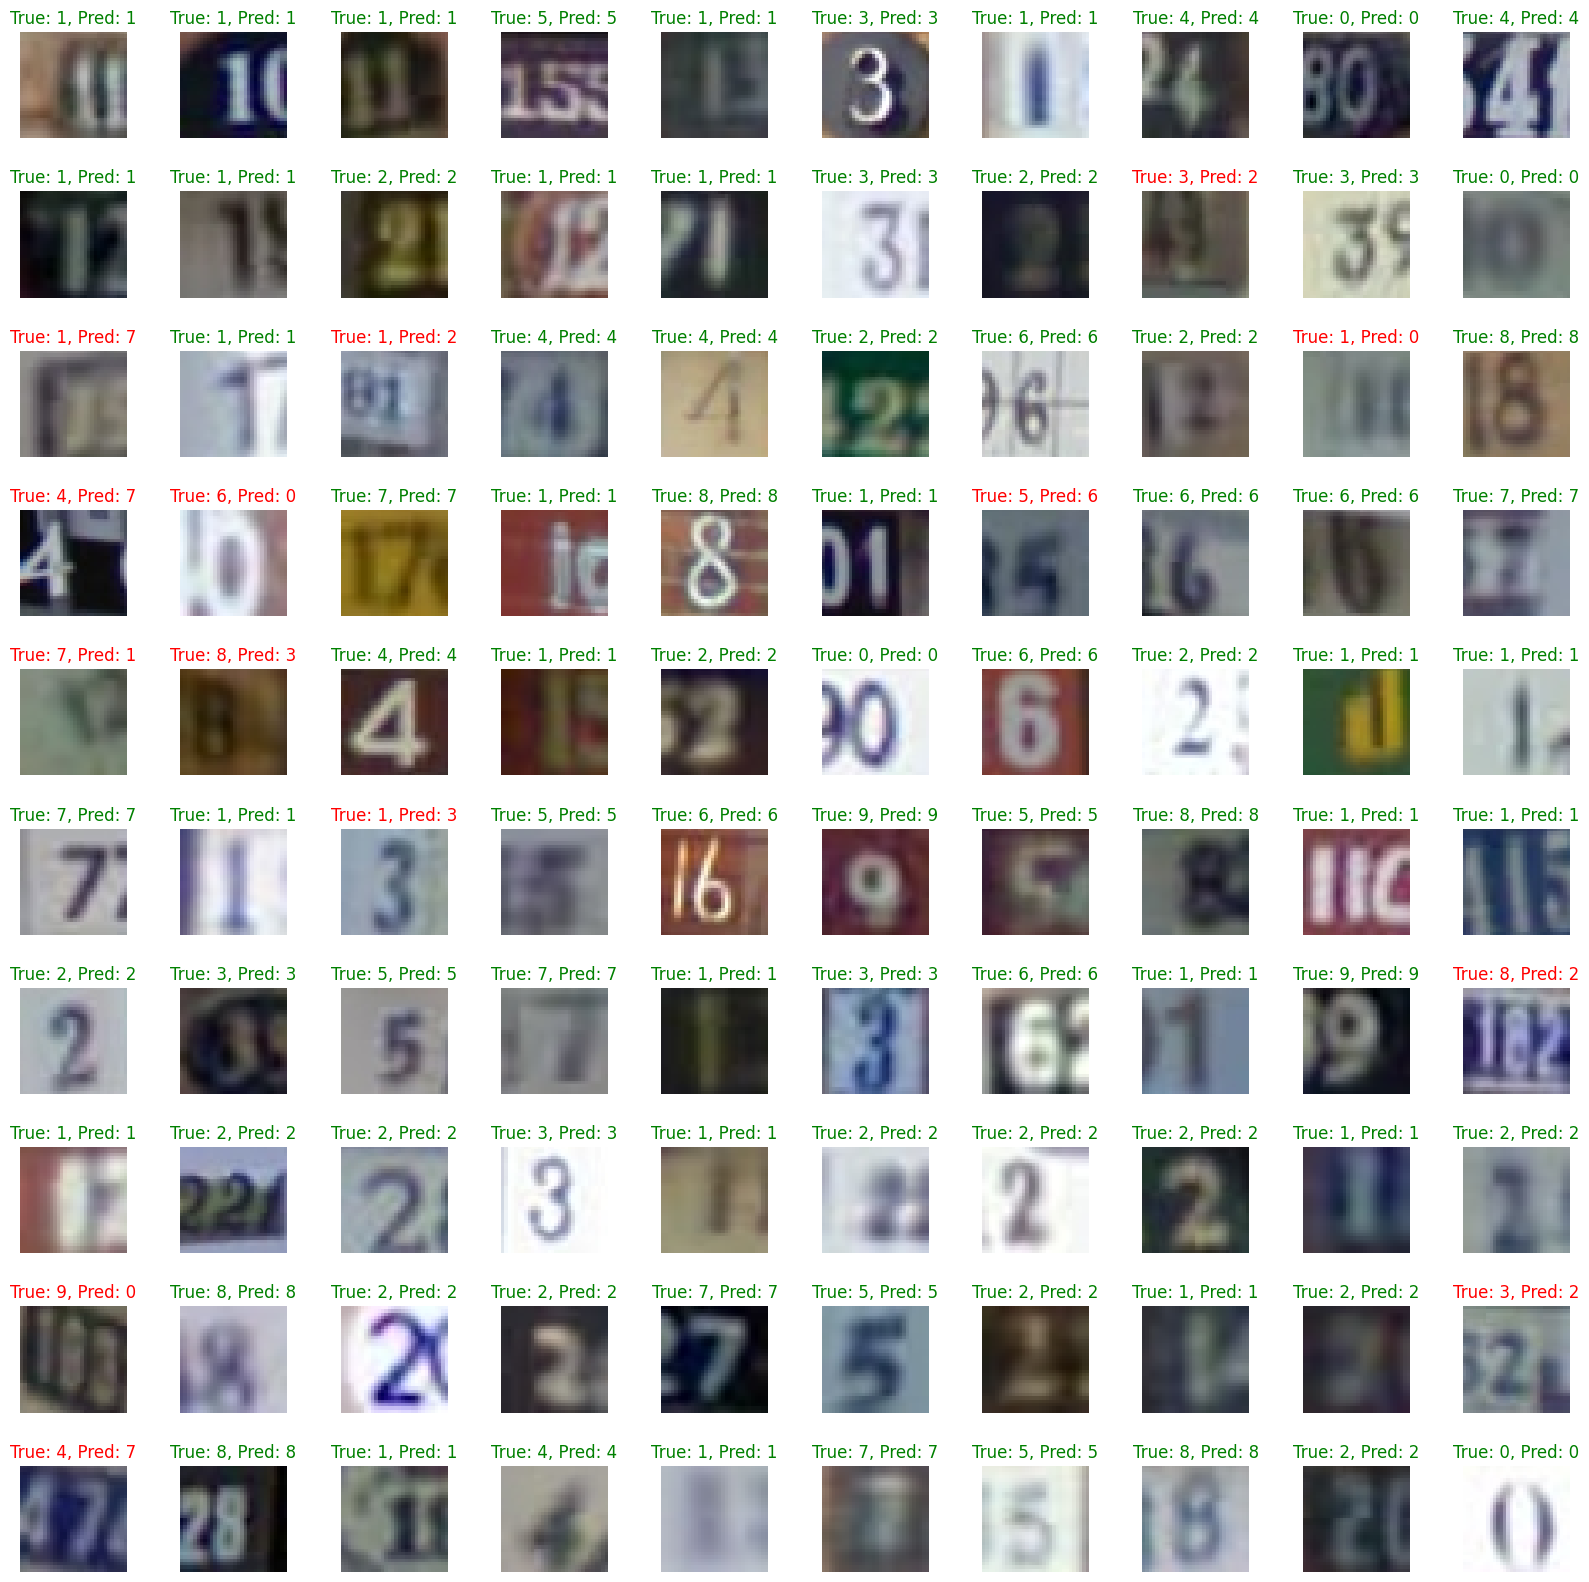

In [18]:
# Membuat prediksi pada dataset testing
predictions = model.predict(X_test)

# Fungsi untuk memvisualisasikan hasil prediksi dengan jarak antar gambar
def visualize_predictions(X, y_true, y_pred, rows=5, cols=5, wspace=0.5, hspace=0.5):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
    fig.subplots_adjust(wspace=wspace, hspace=hspace)
    num_images = rows * cols
    for i in range(num_images):
        index = random.randint(0, len(X) - 1)
        image = X[index]
        true_label = np.argmax(y_true[index])
        predicted_label = np.argmax(y_pred[index])
        ax = axes[i // cols, i % cols]
        ax.imshow(image)
        ax.set_title(f'True: {true_label}, Pred: {predicted_label}', color='green' if true_label == predicted_label else 'red')
        ax.axis('off')
    plt.show()

# Visualisasi beberapa hasil prediksi
visualize_predictions(X_test, y_test, predictions, rows=10, cols=10, wspace=0.5, hspace=0.5)